### SIR Model
https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_without_vital_dynamics

$$
\frac{dS}{dt}= -\beta I S \\
\frac{dI}{dt}= \beta I S -\gamma I\\
\frac{dR}{dt}= \gamma I \\
$$

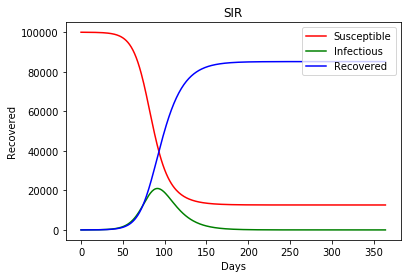

In [1]:
get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt

def SIR(s,i,r,Ro,Tr,a,b,shift):

    def s_prime(s):
        return  -beta*i*s
    def i_prime(i):
        return  beta*i*s-gamma*i
    def r_prime(r):
        return  gamma*i

    #def f(x,t):
    #    return -x**3 + np.sin(t)

    #a = 0.0         # Start of the interval in days
    #b = 300.0      # End of the interval in days
    T = (b-a)     # Number of steps
    h = 1#(b-a)/T        # Size of a single step

    N = s+i+r
    beta = Ro/Tr/N   #COVID-19,14days,100k
    gamma = 1/Tr      #

    #create the array of time values and (empty) x-values, and loop over 
    #all times supplementing x each time
    tpoints = np.arange(a+shift,b+shift,h)
    spoints = []
    ipoints = []
    rpoints = []

    for t in tpoints:
        spoints.append(s)
        ipoints.append(i)
        rpoints.append(r)
        s += h*s_prime(s)
        i += h*i_prime(i)
        r += h*r_prime(r)

    return [tpoints,spoints,ipoints,rpoints]

#important part
Ro = 2.4
Tr = 12.9
start = 0.
end = 365.
shift=0.

s = 99990.0  # Initial condition
i = 10.0     # Initial condition
r = 0.0      # Initial condition

[tpoints,spoints,ipoints,rpoints]=SIR(s,i,r,Ro,Tr,start,end,shift)

plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
plt.legend(loc='upper right')
plt.ylabel("Susceptible")
#plt.twinx()
#plt.semilogy(tpoints,ipoints, color = 'green' , label='Infectious')
plt.plot(tpoints,ipoints, color = 'green' , label='Infectious')
plt.ylabel("Infectious")
plt.legend(loc='upper right')
plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
plt.ylabel("Recovered")
plt.legend(loc='upper right')

plt.title("SIR")
plt.xlabel("Days")
plt.savefig('SIR Model.png', dpi = 300)
plt.show()

#plt.plot(spoints,ipoints, color = 'red' , label='Predator')
#plt.xlabel("Susceptible")
#plt.ylabel("Infectious")
#plt.savefig('SIR xy.png', dpi = 300)
#plt.show()


### SEIR Model
https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model

$$
\frac{dS}{dt}= -\beta I S \\
\frac{dE}{dt}= \beta I S -a E\\
\frac{dI}{dt}= a E -\gamma I\\
\frac{dR}{dt}= \gamma I \\
$$

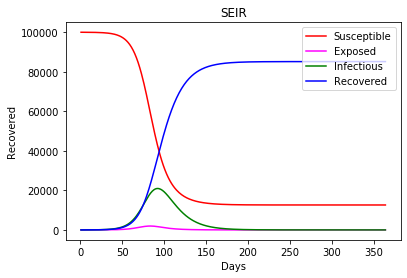

In [2]:
get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt

def SEIR(s,e,i,r,Ro,Tr,Ta,a,b):

    def s_prime(x):
        return  -beta*i*s
    def e_prime(x):
        return  beta*i*s-a*e
    def i_prime(x):
        return  a*e-gamma*i
    def r_prime(x):
        return  gamma*i

    #def f(x,t):
    #    return -x**3 + np.sin(t)

    T = (b-a)      # Number of steps
    h = (b-a)/T    # Size of a single step

    N = s+e+i+r    # Initial population
    beta = Ro/Tr/N   #COVID-19,14days,100k
    gamma = 1/Tr
    a = 1/Ta

    #create the array of time values and (empty) x-values, and loop over 
    #all times supplementing x each time
    tpoints = np.arange(a,b,h)
    spoints = []
    epoints = []
    ipoints = []
    rpoints = []

    for t in tpoints:
        spoints.append(s)
        epoints.append(e)
        ipoints.append(i)
        rpoints.append(r)
        s += h*s_prime(s)
        e += h*e_prime(e)
        i += h*i_prime(i)
        r += h*r_prime(r)

    return [tpoints,spoints,epoints,ipoints,rpoints]

#important part
Ro = 2.4
Tr = 12.9
Ta = 1.

start = 0.
end = 365.

s = 99990.0  # Initial condition
e = 0.0        # Initial condition
i = 10.0     # Initial condition
r = 0.0      # Initial condition

[tpoints,spoints,epoints,ipoints,rpoints]=SEIR(s,e,i,r,Ro,Tr,Ta,start,end)

plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
plt.legend(loc='upper right')
plt.ylabel("Susceptible")
#plt.twinx()
#plt.semilogy(tpoints,ipoints, color = 'green' , label='Infectious')
plt.plot(tpoints,epoints, color = 'magenta' , label='Exposed')
plt.ylabel("Exposed")
plt.plot(tpoints,ipoints, color = 'green' , label='Infectious')
plt.ylabel("Infectious")
plt.legend(loc='upper right')
plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
plt.ylabel("Recovered")
plt.legend(loc='upper right')

plt.title("SEIR")
plt.xlabel("Days")
plt.savefig('SEIR Model.png', dpi = 300)
plt.show()

#plt.plot(spoints,ipoints, color = 'red' , label='Predator')
#plt.xlabel("Susceptible")
#plt.ylabel("Infectious")
#plt.savefig('SEIR xy.png', dpi = 300)
#plt.show()

## Pull data from Johns Hopkins CSSE repository

In [3]:
#!git clone https://github.com/CSSEGISandData/COVID-19/
#!cd COVID-19
#git pull 

## Import LIbraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines

## Get Covid-19 Data by Country or State

In [5]:
def get_covid19(df,nation,pop):
    #print(df[0][[((df[['Country/Region']]==nation)|(df[['Province/State']]==nation))]])
    #I=df[0][(((df['Country/Region']==nation)|(df['Province/State']==nation)))]
    #D=df[1][((df[['Country/Region']]==nation)|(df[['Province/State']]==nation))]
    #R=df[2][((df[['Country/Region']]==nation)|(df[['Province/State']]==nation))]
    I2=df[0][(df[0]['Country/Region']==nation)]
    D2=df[1][(df[0]['Country/Region']==nation)]
    R2=df[2][(df[0]['Country/Region']==nation)]
    #I=df[0]
    #D=df[1]
    #R=df[2]
    #I.sum().T[4:].plot(label='Infected: {:,.0f}'.format(I.sum()[-1]),color='#1f77b4')
    #I.sum().T[4:].plot(logy=True,label=nation+': {:,.0f}'.format(I.sum()[-1]))
    #print(I.columns[4:])
    #print(I.sum().T[4:].index)

    #Countries
    #pop*=1.e-5
    I2=I2.sum().T[4:]
    I2=[I2/pop*1e5 for I2 in I2]
    I2=np.array(I2).T
    R2=R2.sum().T[4:]
    R2=[R2/pop*1e5 for R2 in R2]
    R2=np.array(R2).T
    D2=D2.sum().T[4:]
    D2=[D2/pop*1e5 for D2 in D2]
    D2=np.array(D2).T
    S2=[]
    for i in np.arange(len(I2)):
        S2.append(pop-I2[i]-R2[i]-D2[i])
    S2=[S2/pop*1e5 for S2 in S2]
    S2=np.array(S2).T
    E2=[]
    for i in np.arange(len(I2)):
        E2.append(100*D2[i]-I2[i]-R2[i])
    E2=[E2/pop*1e5 for E2 in E2]
    E2=np.array(E2).T
    #States
    #I2=np.array(I.T[4:]).T[0]
    #print([S2,I2,R2,D2])
    return [S2,E2,I2,R2,D2]

## Plot Data

In [31]:
def plot_covid19(data,titles):
    [S,E,I,D,R]=data
    x=np.arange(len(I))
    for i in np.arange(1,3):
        title=titles[i]
        plt.semilogy(x,data[i],'.',basey=10,label=nation+' '+': {:,.0f}'.format(data[i][-1]))
        #plt.plot(x,data[i],'.',label=nation+' '+': {:,.0f}'.format(data[i][-1]))
        #plt.xlim(0,100)
        #plt.ylim(1e-2,1e2)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.title('COVID-19 Cases per 100,000'+' by Country')
        plt.ylabel('COVID-19 Cases per 100,000')
        ax.grid(which='minor',alpha=0.25)
        ax.grid(which='major',alpha=0.5)

## Fit to Exponential Using LMFit

In [32]:
def exp_fit_covid(data,start,end):
    import matplotlib.pyplot as plt
    import numpy as np
    import lmfit
    from scipy.optimize import curve_fit
        
    p = lmfit.Parameters()
    #p.add_many( ('a', 1., True),('b', 0.1, True),('c', 0., True),)
    p.add_many( ('a1', 100, True),('b1', 50., True),('c1', 30., True),('d1', 0., True),
               ('a2', 100, True),('b2', 50., True),('c2', 30., True),('d2', 0., True),
               ('a3', 100, True),('b3', 50., True),('c3', 30., True),('d3', 0., True),
               ('a4', 100, True),('b4', 50., True),('c4', 30., True),('d4', 0., True),
               ('a5', 100, True),('b5', 50., True),('c5', 30., True),('d5', 0., True),)
    
#    def residual(p,x=None,S=None,I=None,D=None):
    def residual(p):
        v = p.valuesdict()
        resid=[(v['a1'] * np.exp((x - v['c1'])/ v['b1']) + v['d1'] - S),#*np.sqrt(S),
               (v['a2'] * np.exp((x - v['c2'])/ v['b2']) + v['d2'] - I),#*np.sqrt(S),
               (v['a3'] * np.exp((x - v['c3'])/ v['b3']) + v['d3'] - R),#*np.sqrt(S),
               (v['a4'] * np.exp((x - v['c4'])/ v['b4']) + v['d4'] - D),#*np.sqrt(S),
               (v['a5'] * np.exp((x - v['c5'])/ v['b5']) + v['d5'] - D),#*np.sqrt(S),
              ]
        resid=np.array(resid)
        return resid.flatten()
    
    #print(x,I2)
    #start=0
    #end=100
    #y=data
    #start=0
    #end=len(data[0])
    
    data2=[]
    for d in data:
        data2.append(d[start:])
    data=data2
    [S,E,I,R,D]=data
    x=np.arange(start,end)
    #print(np.size(x),np.size(data),np.size(I))
    
    #[S,I,R]=IDR2SIR([I,D,R],pop)
    
    #x=np.arange(48,58)
    #popt, pcov = curve_fit(exp, x[start:end], I2[start:end], p0=[1.,0.3,0.], maxfev=10000)
    #popt, pcov = curve_fit(exp, x[start:end], I2[start:end], p0=[1.,0.3,0.])
    #perr = np.sqrt(np.abs(np.diag(pcov)))
                
    mini = lmfit.Minimizer(residual, p, nan_policy='propagate')
    #mi = mini.minimize(method='Nelder')
    #mi   = mini.minimize(method='leastsq', params=mi.params)
    mi   = mini.minimize(method='leastsq')

    #mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit',maxfev=2000)
    #mi = lmfit.minimize(residual, p, method='nelder', nan_policy='omit')
    #mi = lmfit.minimize(residual, p, nan_policy='omit')

    print(' BIC: ',mi.bic,' Exp: '+mi.params['b3'].name,mi.params['b3'].value,mi.params['b3'].stderr,end='')
    #lmfit.printfuncs.report_fit(mi.params, min_correl=0.5)
    #print(lmfit.fit_report(mi))
    #print('-------------------------------')
    #print('Parameter    Value       Stderr')
    #for name, param in mi.params.items():
    #    print('{:7s} {:11.5f} {:11.5f}'.format(name, param.value, param.stderr))
    #    print(lmfit.fit_report(mi))

    plt.plot(x, np.reshape(residual(mi.params),np.shape(data))[1]+I, '-',label='b2: %3.1f'% tuple([mi.params['b2']]))
    plt.plot(x, np.reshape(residual(mi.params),np.shape(data))[2]+R, '-')
    #plt.plot(x, np.reshape(residual(mi.params),np.shape(data))[2]+R, '-',label='b3: %3.1f'% tuple([mi.params['b3']]))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


## Fit to SIR Model using LMFit

https://lmfit.github.io/lmfit-py/

In [56]:
def SIR(s,i,r,Ro,Tr,a0,b0,shift):

    def s_prime(s):
        return  -beta*i*s
    def i_prime(i):
        return  beta*i*s-gamma*i
    def r_prime(r):
        return  gamma*i

    #def f(x,t):
    #    return -x**3 + np.sin(t)

    #a = 0.0         # Start of the interval in days
    #b = 100.0      # End of the interval in days
    #T = (b-a)     # Number of steps
    h = 1#(b-a)/T        # Size of a single step

    N = s+i+r
    beta = Ro/Tr/N   #COVID-19,14days,100k
    gamma = 1/Tr      #

    #create the array of time values and (empty) x-values, and loop over 
    #all times supplementing x each time
    #tpoints = np.arange(a,b,h)
    #print(a0,b0)
    tpoints = np.arange(a0+shift,b0+shift)
    spoints = []
    ipoints = []
    rpoints = []

    for t in tpoints:
        spoints.append(s)
        ipoints.append(i)
        rpoints.append(r)
        s += h*s_prime(s)
        i += h*i_prime(i)
        r += h*r_prime(r)

    return [tpoints,spoints,ipoints,rpoints]

def SIR_fit_covid(data,start,end,shif,extendt):    
    import matplotlib.pyplot as plt
    import numpy as np
    import lmfit
    from scipy.optimize import curve_fit

    [S,E,I,R,D]=data
    #important part
    Ro = 2.4
    Tr = 12.9
    #start = 35
    #end = len(I)
    s = S[0]  # Initial condition
    i = I[0]  # Initial condition
    r = R[0]  # Initial condition
    d = D[0]
    
    p = lmfit.Parameters()
    p.add_many(('s', s, False),
            ('i', i, True),
            ('r', r, False),
            ('Ro', Ro, True),
            ('Tr', Tr, True),
            ('start', start, False),
            ('end', end, False),
            ('shift',shift, False))
        
    def residual(p):
        v = p.valuesdict()
        [tpoints,spoints,ipoints,rpoints] = SIR(v['s'],v['i'],v['r'],v['Ro'],v['Tr'],v['start'],v['end'],v['shift'])
        #print(len(tpoints),len(spoints),len(ipoints),len(rpoints),len(S),len(I),len(R),)
        #print(len(tpoints),len(spoints),len(S),len(ipoints),len(I),len(rpoints),len(R),)
        #resid=[(spoints-S)/np.sqrt(S),(ipoints-I)/np.sqrt(I),(rpoints-R)/np.sqrt(R)]
        if len(spoints) == len(S): 
            resid=[(spoints-S),(ipoints-I),(rpoints-R)]
        elif len(spoints)<len(S): 
            resid=[(spoints-S[1:]),(ipoints-I[1:]),(rpoints-R[1:])]
        else:
            resid=[(spoints[1:]-S),(ipoints[1:]-I),(rpoints[1:]-R)]
        resid=np.array(resid)
        return resid.flatten()
                
    data2=[]
    for d in data:
        data2.append(d[start:])
    data=data2
    [S,E,I,R,D]=data
    x=np.arange(start+shift,end+shift)
    
    mini = lmfit.Minimizer(residual, p, nan_policy='propagate')

    #mi = mini.minimize(method='Nelder')
    #lmfit.printfuncs.report_fit(mi.params)#, min_correl=0.5)

    mi   = mini.minimize(method='leastsq')
    #mi   = mini.minimize(method='leastsq', params=mi.params)
    #lmfit.printfuncs.report_fit(mi.params)#, min_correl=0.5)
    print(' BIC: ',mi.bic,' SIR: '+mi.params['Ro'].name,mi.params['Ro'].value,mi.params['Ro'].stderr,mi.params['Tr'].value,mi.params['Tr'].stderr,end='')
    
    plt.plot(x, np.reshape(residual(mi.params),[3,len(I)])[1]+I, '-',label='Ro: %3.2f'% tuple([mi.params['Ro']]))
    plt.plot(x, np.reshape(residual(mi.params),[3,len(R)])[2]+R, '-')#,label='Ro: %3.2f'% tuple([mi.params['Ro']]))
    v = mi.params
    [tpoints,epoints,ipoints,rpoints]=SIR(v['s'],v['i'],v['r'],v['Ro'],v['Tr'],v['start'],v['end']+extend,v['shift'])
    plt.plot(tpoints,ipoints,'-',label='Ro: %3.2f'% tuple([mi.params['Ro']]))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Fit to SEIR Model using LMFit

In [57]:
def SEIR(s,e,i,r,Ro,Tr,Ta,a0,b0,shift,extend):

    def s_prime():
        return  -beta*i*s
    def e_prime():
        return  beta*i*s-alpha*e
    def i_prime():
        return  alpha*e-gamma*i
    def r_prime():
        return  gamma*i

    #def f(x,t):
    #    return -x**3 + np.sin(t)

    #a = 0.0         # Start of the interval in days
    #b = 100.0      # End of the interval in days
    #T = (b-a)     # Number of steps
    h = 1#(b-a)/T        # Size of a single step

    N = s+e+i+r
    alpha = 1/Ta
    beta = Ro/Tr/N   #COVID-19,14days,100k
    gamma = 1/Tr      #

    #create the array of time values and (empty) x-values, and loop over 
    #all times supplementing x each time
    #tpoints = np.arange(a,b,h)
    #print(a0,b0)
    tpoints = np.arange(a0+shift,b0+shift)
    spoints = []
    epoints = []
    ipoints = []
    rpoints = []

    for t in tpoints:
        spoints.append(s)
        epoints.append(e)
        ipoints.append(i)
        rpoints.append(r)
        s += h*s_prime()
        e += h*e_prime()
        i += h*i_prime()
        r += h*r_prime()

    return [tpoints,spoints,epoints,ipoints,rpoints]

def SEIR_fit_covid(data,start,end,shift):    
    import matplotlib.pyplot as plt
    import numpy as np
    import lmfit
    from scipy.optimize import curve_fit

    [S,E,I,R,D]=data
    #important part
    Ro = 2.4
    Tr = 12.9
    Ta = 1.
    #start = 35
    #end = len(I)
    s = S[0]  # Initial condition
    e = E[0]  # Initial condition
    i = I[0]  # Initial condition
    r = R[0]  # Initial condition
    d = D[0]
    
    p = lmfit.Parameters()
    p.add_many(('s', s, False),
            ('e', e, False),
            ('i', i, True),
            ('r', r, False),
            ('Ro', Ro, True),
            ('Tr', Tr, True),
            ('Ta', Ta, True),
            ('start', start, False),
            ('end', end, False),
            ('shift',shift, False))
        
    def residual(p):
        v = p.valuesdict()
        [tpoints,spoints,epoints,ipoints,rpoints] = SEIR(v['s'],v['e'],v['i'],v['r'],v['Ro'],v['Tr'],v['Ta'],v['start'],v['end'],v['shift'])
        #print(len(tpoints),len(spoints),len(ipoints),len(rpoints),len(S),len(I),len(R),)
        #print(len(tpoints),len(spoints),len(S),len(ipoints),len(I),len(rpoints),len(R),)
        #resid=[(spoints-S)/np.sqrt(S),(ipoints-I)/np.sqrt(I),(rpoints-R)/np.sqrt(R)]
        if len(spoints) == len(S): 
            resid=[(spoints-S),(epoints-E),(ipoints-I),(rpoints-R)]
        elif len(spoints)<len(S): 
            resid=[(spoints-S[1:]),(epoints-E[1:]),(ipoints-I[1:]),(rpoints-R[1:])]
        else:
            resid=[(spoints[1:]-S),(epoints[1:]-E),(ipoints[1:]-I),(rpoints[1:]-R)]
        resid=np.array(resid)
        return resid.flatten()
                
    data2=[]
    for d in data:
        data2.append(d[start:])
    data=data2
    [S,E,I,R,D]=data
    x=np.arange(start+shift,end+shift)
    
    mini = lmfit.Minimizer(residual, p, nan_policy='propagate')

    #mi = mini.minimize(method='Nelder')
    #lmfit.printfuncs.report_fit(mi.params)#, min_correl=0.5)

    mi   = mini.minimize(method='leastsq')
    #mi   = mini.minimize(method='leastsq', params=mi.params)
    #lmfit.printfuncs.report_fit(mi.params)#, min_correl=0.5)
    print(' BIC: ',mi.bic,' SEIR: ',mi.params['Ro'].name,mi.params['Ro'].value,mi.params['Ro'].stderr,mi.params['Tr'].name,mi.params['Tr'].value,mi.params['Tr'].stderr,mi.params['Ta'].name,mi.params['Ta'].value,mi.params['Ta'].stderr,end='')

    plt.plot(x, np.reshape(residual(mi.params),[4,len(I)])[2]+I, '-',label='Ro: %3.2f'% tuple([mi.params['Ro']]))
    plt.plot(x, np.reshape(residual(mi.params),[4,len(R)])[3]+R, '-')#,label='Ro: %3.2f'% tuple([mi.params['Ro']]))
    v = mi.params
    [tpoints,spoints,epoints,ipoints,rpoints]=SEIR(v['s'],v['e'],v['i'],v['r'],v['Ro'],v['Tr'],v['Ta'],v['start'],v['end']+extend,v['shift'])
    plt.plot(tpoints,ipoints,'-',label='Ro: %3.2f'% tuple([mi.params['Ro']]))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Important Part

--Specify dataset, path, datafiles, model, range to fit and execute. 

--Select Country.

--Save Output to Files.

China  BIC:  208.06138228964375  SIR: Ro 0.7059761772887385 0.14070478547254267 92.8389196561708 12.096933905540695


<Figure size 432x288 with 0 Axes>

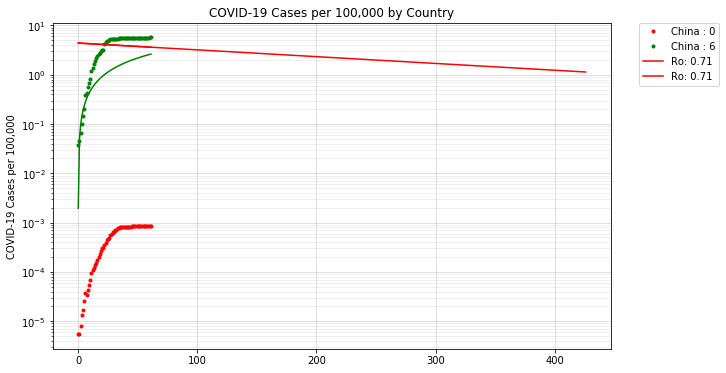

Korea, South  BIC:  491.35557809808097  SIR: Ro 899.609090774298 95413.50914108545 43598.98792168268 4625679.967673116


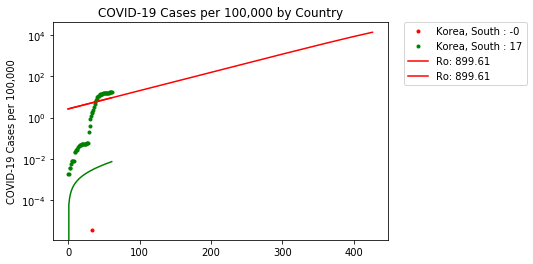

Japan  BIC:  -713.2127893271019  SIR: Ro 53.18699015219632 170.16746083831524 2360.9011887194015 7493.035666611756


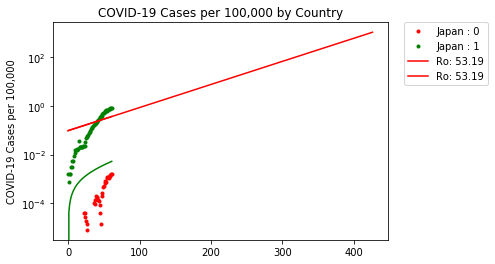

Italy  BIC:  939.1893594308348  SIR: Ro 11717.822748365441 5729253.7157490775 80986.77710349712 39604585.000280626


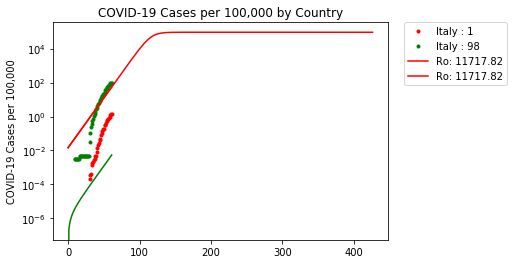

Iran  BIC:  554.9923916622515  SIR: Ro 718.1113644606484 49859.206627760665 7468.850852597473 519107.6734746661


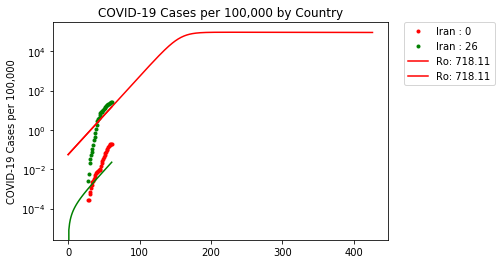

Spain  BIC:  722.9256227859051  SIR: Ro 6128.914705435303 2432436.6191762765 30772.951730819485 12213232.651776738


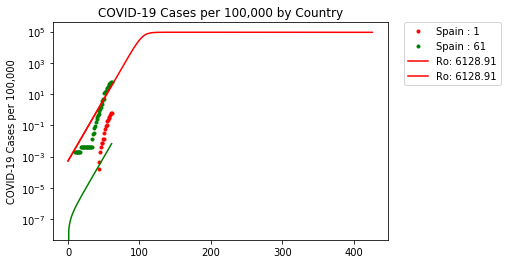

France  BIC:  397.16953140401154  SIR: Ro 1080.3053257317333 86610.59214204733 6245.650167436555 501200.3680794453


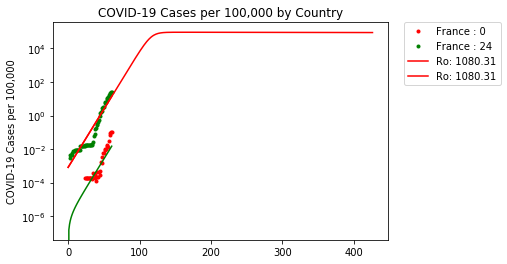

United Kingdom  BIC:  -21.73347787494636  SIR: Ro 254.991057675475 4670.421506863385 1167.5657607735145 21474.991013041843


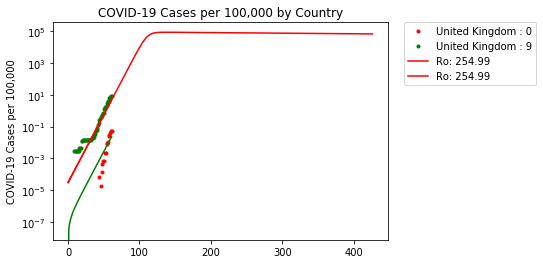

US  BIC:  -3.245945216002104  SIR: Ro 232.6923884634152 3939.274757013291 775.0179529088908 13164.07941874771


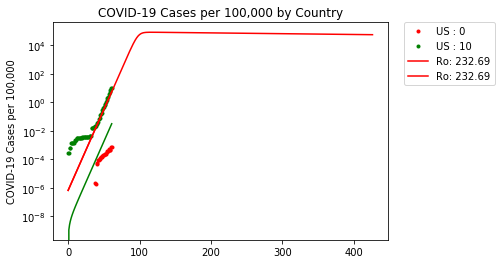

<Figure size 432x288 with 0 Axes>

In [58]:
path='/Volumes/GoogleDrive/My Drive/Research/github/COVID-19/'
path=path+'archived_data/archived_time_series/'
#path='csse_covid_19_data/csse_covid_19_time_series/'
#path='COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
files=[
'time_series_19-covid-Confirmed_archived_0325.csv',
'time_series_19-covid-Deaths_archived_0325.csv',
'time_series_19-covid-Recovered_archived_0325.csv'
]

df=[]
for file in files:
    df_index=pd.read_csv(path+file)
    df.append(df_index)
    
#df_pop=pd.read_csv('populations.csv', lineterminator='\n')
df_pop=pd.read_excel('populations.xlsx',header=None)

nations=[
    'China',
    'Korea, South',
    'Japan',
#    'Taiwan*'
    'Italy',
    'Iran',
    'Spain',
    'France',
    'United Kingdom',
    'US',
#    'Russia',
#    'New York',
#    'Washington',
#    'California',
#    'Florida',
#    'Colorado',
#    'Nevada',
#    'Oregon',
#    'Utah',
#    'Idaho',
#    'Montana',
#    'Wyoming',
#    'New Mexico'
]
start=[5,30,35]
#start=[0,0,0]
titles=['Susceptible','Infected','Recovered','Dead']
#for df_i in df: 
fig=plt.figure();
fig, ax = plt.subplots(figsize=(10,6));
#plt.gca().set_prop_cycle(color=['r','g','b','m','r','g','b','m'])
#plt.gca().set_prop_cycle(color=['r','g','b','r','g','b'])

for i in np.arange(len(nations)):
    plt.gca().set_prop_cycle(color=['r','g','r','g'])
    nation=nations[i]
    print(nation,end=' ')
    pop=df_pop[(df_pop[0]==nation)][1].values
    pop=pop[0]
    #plt.gca().set_prop_cycle(color=['r','r','g','g','b','b','c','c','m','m','y','y','k','k'])
    data=get_covid19(df,nation,pop)
    plot_covid19(data,titles)
    #exp_fit_covid(data,0,len(data[0]))
    extend=365
    SIR_fit_covid(data,0,len(data[0]),0,extend)        
    #SEIR_fit_covid(data,0,len(data[0]),0,extend) 
    print()
    plt.savefig('COVID-19 Coronavirus '+nation+'.png',bbox_inches='tight')
    #plt.savefig('COVID-19 Coronavirus '+nation+'.pdf',bbox_inches='tight')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    
plt.savefig('COVID-19 Coronavirus'+'.png',bbox_inches='tight')
plt.show()